In [1]:
%matplotlib inline
from kid_readout.measurement.io import npy

In [2]:
npd_350 = npy.NumpyDirectory('/data/detectors/2016-10-25_141727_sweep_stream_on_off/')
npd_110 = npy.NumpyDirectory('/data/detectors/2016-10-18_124841_sweep_stream_on_off/')

In [3]:
snaps_350 = [npd_350.read(name) for name in npd_350.node_names() if name.startswith('ADCSnap')]
snaps_110 = [npd_110.read(name) for name in npd_110.node_names() if name.startswith('ADCSnap')]

In [10]:
attenuation_colors = {20: 'blue', 30: 'green', 40: 'red', 50: 'black'}

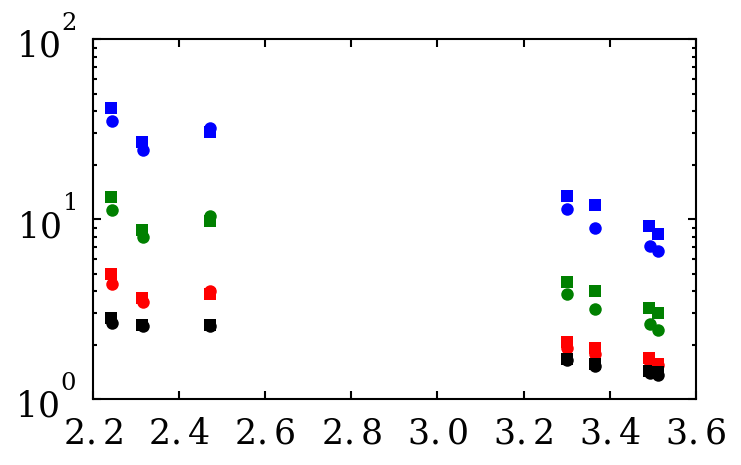

In [16]:
fig, ax = plt.subplots()
for snap in snaps_110:
    ax.semilogy(1e-9 * snap.state.lo_frequency, np.std(snap.x), 'o',
                color=attenuation_colors[int(snap.state.dac_attenuation)])
for snap in snaps_350:
    ax.semilogy(1e-9 * snap.state.lo_frequency, np.std(snap.x), 's',
                color=attenuation_colors[int(snap.state.dac_attenuation)])

In [9]:
first20 = snaps_350[0]
last20 = snaps_350[-4]
last50 = snaps_350[-1]

In [32]:
last20.state

StateDict({u'boffile': u'iq2xpfb14mcr11_2016_Jun_30_1301.bof', u'modulation_output': 0, u'modulation_rate': 0, u'fft_shift_register': 1048560, u'num_tone_samples': 262144, u'bank': 255, u'num_filterbank_channels': 16384, u'loopback': False, u'lo_frequency': 3512200000.0000005, u'adc_sample_rate': 512000000.0, u'waveform_normalization': 7.62939453125e-06, u'hardware_delay_samples': -16025.6, u'num_tones': 2, u'debug_register': 0, u'reference_sequence_number': -1, u'dac_attenuation': 20.0, u'heterodyne': True})

In [33]:
time = np.arange(first20.x.size) / first20.state.adc_sample_rate

In [34]:
np.std(last20.x)

8.3347228826887623

In [35]:
np.std(last20.y)

8.7812699830177436

(0, 1)

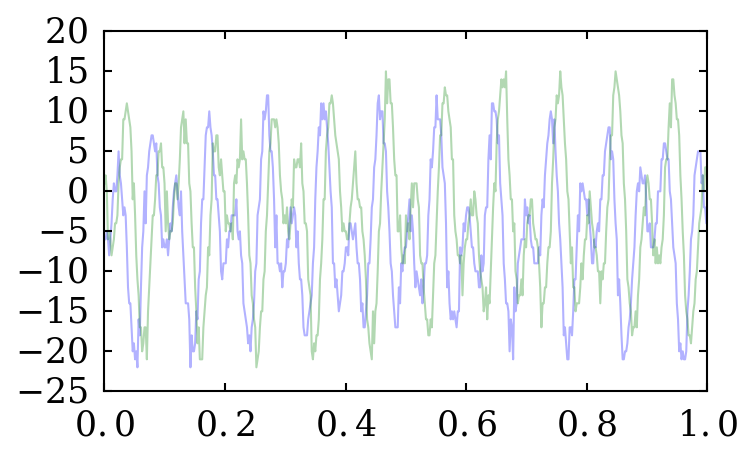

In [36]:
fig, ax = plt.subplots()
ax.plot(1e6 * time, last20.x, '-b', alpha=0.3)
ax.plot(1e6 * time, last20.y, '-g', alpha=0.3)
ax.set_xlim(0, 1)

(0, 1)

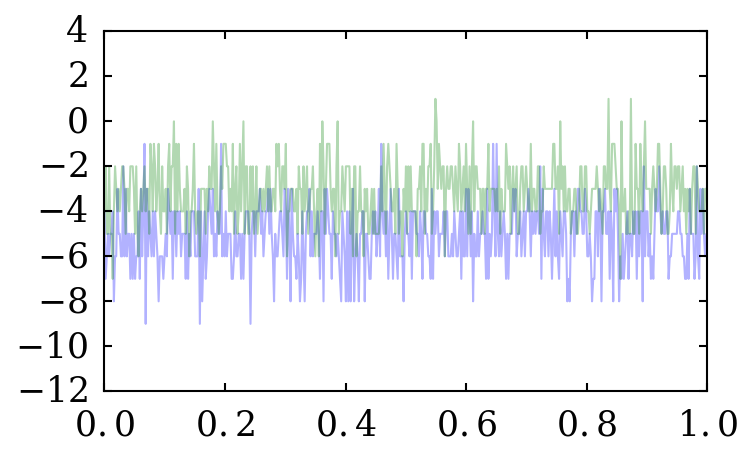

In [37]:
fig, ax = plt.subplots()
ax.plot(1e6 * time, last50.x, '-b', alpha=0.3)
ax.plot(1e6 * time, last50.y, '-g', alpha=0.3)
ax.set_xlim(0, 1)

(0, 1)

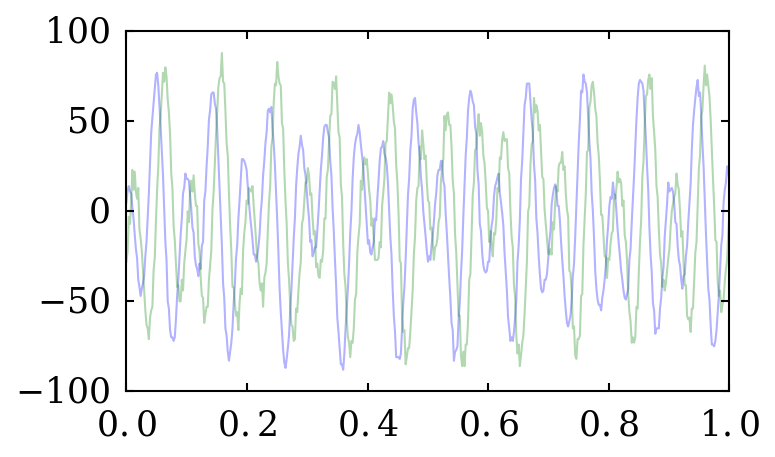

In [17]:
fig, ax = plt.subplots()
ax.plot(1e6 * time, first.x, '-b', alpha=0.3)
ax.plot(1e6 * time, first.y, '-g', alpha=0.3)
ax.set_xlim(0, 1)

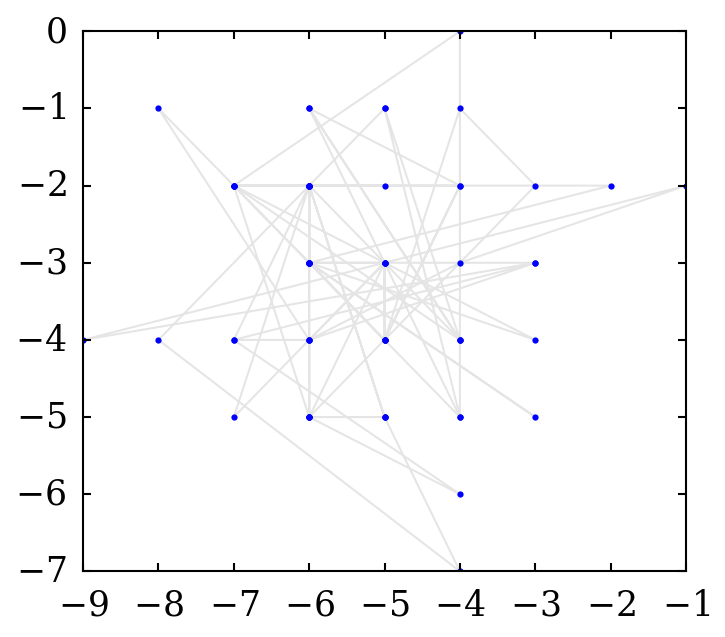

In [27]:
start = 0
stop = time.size // 64
fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(last.x[start:stop], last.y[start:stop], '-k', alpha=0.1)
ax.plot(last.x[start:stop], last.y[start:stop], '.b')
